In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
unnormalized_data = pd.read_csv(r"clustering_points.csv")
unnormalized_data = unnormalized_data.sample(frac=1).reset_index(drop=True)
scaler = preprocessing.MinMaxScaler()
col_names = unnormalized_data.columns
df = scaler.fit_transform(unnormalized_data)
data = pd.DataFrame(df, columns=col_names)
data

,Ft1,Ft2,Cluster
0,0.455607,0.886307,0.0
1,0.183744,0.110893,1.0
2,0.210032,0.158605,1.0
3,0.106302,0.132590,1.0
4,0.191885,0.029188,1.0
...,...,...,...
395,0.777850,0.421688,0.5
396,1.000000,0.554870,0.5
397,0.167256,0.056141,1.0
398,0.111192,0.044014,1.0


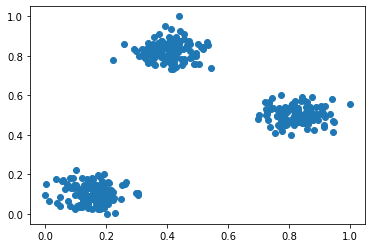

In [3]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [4]:
r = 0.7

In [5]:
def distance(A, B):
    return ((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2) ** (1/2)

In [6]:
def mean(x1,x2):
    return (sum(x1) / len(x1), sum(x2) / len(x2))

In [7]:
def points_in_radius(O,radius):
    list1 = []
    for i in range(data.shape[0]):
        D = distance(O, (data.iloc[i, 0], data.iloc[i, 1]))
        if D <= radius:
            list1.append((data.iloc[i, 0], data.iloc[i, 1],i))
    return list1

In [8]:
def one_cluster_selection(r):
    center = mean(list(data.iloc[:,0]),list(data.iloc[:,1]))
    points = points_in_radius(center, r)
    local_center = (0,0)
    
    while local_center != center:
        center = local_center
        r *= 0.9
        local_center = random.choice(points)
        points = points_in_radius(local_center, r)
        local_center = mean([i[0] for i in points], [i[1] for i in points])
    return points   

In [9]:
clusters=[]
while len(data.index):
    cluster=one_cluster_selection(r)
    for i in cluster:
        data.drop(i[2], inplace = True, axis = 0)
    data.reset_index(drop = True,inplace=True)
    clusters.append(cluster)
       

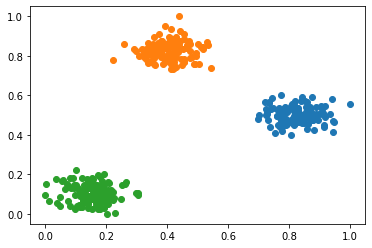

In [10]:
for j in range(len(clusters)):
    plt.scatter([i[0] for i in clusters[j] ],[i[1] for i in clusters[j]])
plt.show()